In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:10<00:00, 75.6MB/s]
100% 1.06G/1.06G [00:10<00:00, 105MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
#Generators in Keras where we work on batches to process images
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #Cat to Zero and Dog to One
    batch_size=32,
    image_size=(256,256), #Reshaping to 256 to 256 coz we don't have same sizes of images
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int', #Cat to Zero and Dog to One
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize so that we don't have 0-255 but 0-1
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
#Import batchnormalization and dropout from keras
from keras.layers import BatchNormalization, Dropout


In [13]:
# Create CNN model

model = Sequential()

#Convolution Layer-1
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
#Normalization Layer
model.add(keras.layers.BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Convolution Layer-2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
#Normalization Layer
model.add(keras.layers.BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Convolution Layer-3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
#Normalization Layer
model.add(keras.layers.BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

#Convolution Layer-4
model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
#Normalization Layer
model.add(keras.layers.BatchNormalization())
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))



#Flattening
model.add(Flatten())

#Full-Connected ANN
model.add(Dense(units=256, activation='relu'))
#Dropout layers
model.add(keras.layers.Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
#Dropout layers
model.add(keras.layers.Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
#Dropout layers
model.add(keras.layers.Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,276,865 (50.65 MB)

 Trainable params: 13,275,905 (50.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
#Fit model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5080 - loss: 3.5581 - val_accuracy: 0.5376 - val_loss: 0.6911
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.5130 - loss: 0.7306 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.5181 - loss: 0.7062 - val_accuracy: 0.5154 - val_loss: 0.6888
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.5370 - loss: 0.6929 - val_accuracy: 0.5702 - val_loss: 0.6860
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5707 - loss: 0.6712 - val_accuracy: 0.6322 - val_loss: 0.6449
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6255 - loss: 0.6420 - val_accuracy: 0.6878 - val_loss: 0.5964
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6871 - loss: 0.5974 - val_accuracy: 0.5316 - val_loss: 0.7350
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.7314 - loss: 0.5516 - 

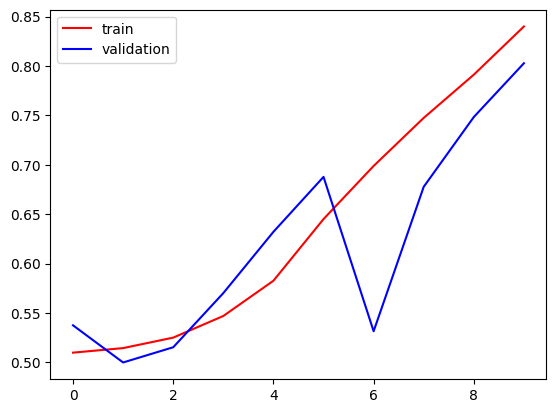

In [16]:
#Graph between Validation Accuracy and training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

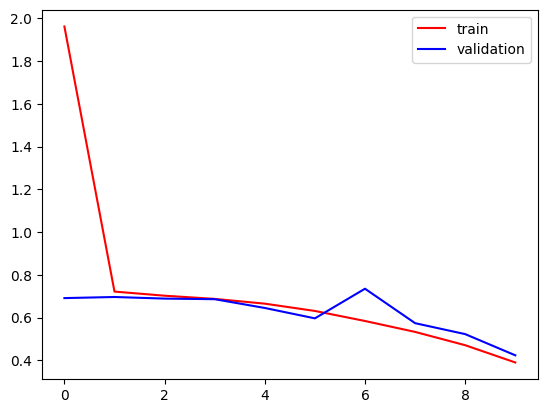

In [17]:
#graph between validation loss and train loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [22]:
import cv2

In [23]:
test_img = cv2.imread("/content/dogesh.jpg")

In [24]:
test_img.shape

(175, 289, 3)

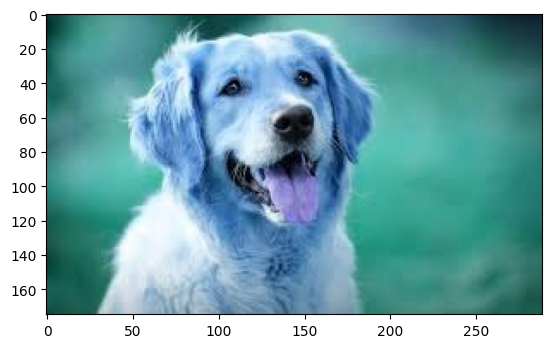

In [25]:
plt.imshow(test_img)

In [26]:
test_img = cv2.resize(test_img, (256,256))

array([[[15, 62, 54],
        [16, 63, 55],
        [15, 64, 56],
        ...,
        [12, 31, 44],
        [12, 31, 44],
        [14, 34, 45]],

       [[14, 61, 53],
        [14, 62, 54],
        [14, 64, 56],
        ...,
        [12, 31, 44],
        [12, 31, 44],
        [14, 34, 45]],

       [[13, 61, 52],
        [13, 62, 54],
        [14, 63, 55],
        ...,
        [13, 32, 45],
        [13, 32, 45],
        [15, 35, 46]],

       ...,

       [[13, 77, 65],
        [14, 78, 66],
        [15, 79, 67],
        ...,
        [31, 93, 81],
        [31, 92, 81],
        [31, 89, 79]],

       [[11, 75, 63],
        [12, 76, 64],
        [13, 77, 65],
        ...,
        [31, 93, 81],
        [32, 92, 81],
        [31, 88, 79]],

       [[10, 74, 62],
        [11, 75, 63],
        [12, 77, 64],
        ...,
        [32, 94, 82],
        [33, 93, 82],
        [30, 87, 78]]], dtype=uint8)
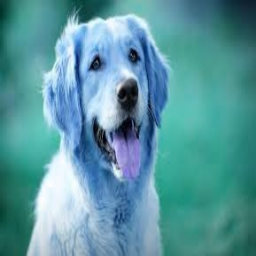

In [27]:
test_img

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.5052338]], dtype=float32)

In [30]:
#predict for suprise_cat.jpg image
test_img = cv2.imread("/content/dog_potty.jpg")


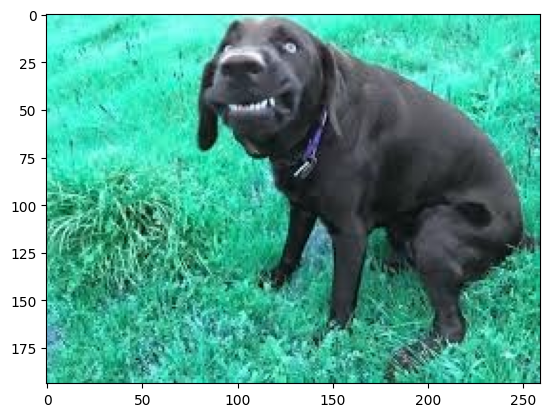

In [31]:
plt.imshow(test_img)

In [33]:
#prediction
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([1.], dtype=float32)

In [34]:
#Predict image at /content/dogs_vs_cats/train/dogs/dog.1.jpg
test_img = cv2.imread("/content/dogs_vs_cats/train/dogs/dog.1.jpg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[1.]], dtype=float32)

In [35]:
#Save this model in pickle file
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [36]:
#import pickle file and let's do prediction form it
model = pickle.load(open('model.pkl', 'rb'))
#Add preprocessing layer so that our image is preprocess to be accepted by model
#Predict image at /content/dogs_vs_cats/train/dogs/dog.1.jpg
test_img = cv2.imread("/content/dogs_vs_cats/train/dogs/dog.1.jpg")
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


array([[1.]], dtype=float32)

In [ ]:
# prompt: #import pickle file and let's do prediction form it
# model = pickle.load(open('model.pkl', 'rb'))
# #Add preprocessing layer so that our image is preprocess to be accepted by model
# #Predict image at /content/dogs_vs_cats/train/dogs/dog.1.jpg
# test_img = cv2.imread("/content/dogs_vs_cats/train/dogs/dog.1.jpg")
# test_img = cv2.resize(test_img,(256,256))
# test_input = test_img.reshape((1,256,256,3))
# model.predict(test_input)
# This is our model, create streamlit file and create a webapp where user input image and it will predict if it is cat or dog.
# Now 0 is cat and 1 is dog so their might be very low value or 0.99999 type of value to remember to change that to nearest 0 or 1 and predict

%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import pickle

# Load the trained model
try:
    model = pickle.load(open('model.pkl', 'rb'))
except FileNotFoundError:
    st.error("Error: model.pkl not found. Please run the training code first.")
    st.stop()

st.title('Dog or Cat Image Classifier')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read the image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Preprocess the image
    img_array = np.array(image)
    img_resized = cv2.resize(img_array, (256, 256))
    img_input = img_resized.reshape((1, 256, 256, 3))
    img_input = tf.cast(img_input / 255., tf.float32) # Normalize

    # Make prediction
    prediction = model.predict(img_input)

    # Get the pre dicted class (0 for cat, 1 for dog)
    predicted_class = round(prediction[0][0])

    # Display the result
    if predicted_class == 1:
        st.subheader('Prediction: Dog')
    else:
        st.subheader('Prediction: Cat')

    st.write(f"Raw prediction value: {prediction[0][0]:.4f}")



Writing app.py
